In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Read in calendar data

In [2]:
cal_df = pd.read_csv(r'data/calendar.csv')
cal_df.shape

(4587685, 7)

In [3]:
cal_df_filtered = cal_df[cal_df['date'].isnull() == False]
cal_df_filtered.shape

(4587685, 7)

In [4]:
cal_df_filtered.head(4)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,865757,2019-07-13,f,$705.00,$705.00,5,30
1,405722,2019-07-13,f,"$1,017.00","$1,017.00",1,1125
2,405722,2019-07-14,f,"$1,017.00","$1,017.00",1,1125
3,405722,2019-07-15,f,"$1,017.00","$1,017.00",1,1125


In [5]:
cal_df_filtered['datetime'] = cal_df_filtered['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [6]:
month_count = cal_df_filtered.set_index(['datetime']).groupby(pd.Grouper(freq='M')).count()['listing_id']
month_count

datetime
2019-07-31    238811
2019-08-31    389639
2019-09-30    377070
2019-10-31    389639
2019-11-30    377070
2019-12-31    389639
2020-01-31    389639
2020-02-29    364501
2020-03-31    389639
2020-04-30    377070
2020-05-31    389639
2020-06-30    377070
2020-07-31    138259
Freq: M, Name: listing_id, dtype: int64

Text(0.5,1,'Most Popular Time of the Year to List')

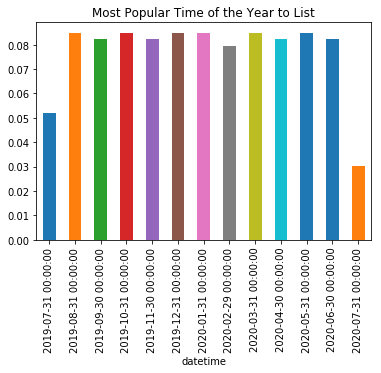

In [7]:
(month_count/cal_df_filtered.shape[0]).plot(kind='bar');
plt.title('Most Popular Time of the Year to List')

### Read in listings summary data

In [8]:
listings_summary_df = pd.read_csv(r'data/listings_summary.csv')

In [9]:
listings_summary_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,3,130,2019-05-02,1.27,1,159
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.20022,114.13461,Entire home/apt,430,2,11,2019-06-09,0.71,1,47
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,853,2,260,2019-07-04,2.65,12,329
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1056,2,259,2019-07-03,2.66,12,308
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,939,2,27,2015-06-30,0.28,1,91


### Read in neighbourhoods

In [10]:
neigh_df = pd.read_csv(r'data/neighbourhoods.csv')

In [11]:
neigh_df.head()

,neighbourhood_group,neighbourhood
0,NaN,Central & Western
1,NaN,Eastern
2,NaN,Islands
3,NaN,Kowloon City
4,NaN,Kwai Tsing


### Read in reviews

In [12]:
reviews_df = pd.read_csv(r'data/reviews.csv')

In [13]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


In [14]:
listings_with_reviews_df = listings_summary_df.merge(reviews_df, left_on='id', right_on='listing_id', how='inner')

In [15]:
listings_with_reviews_df.head()

,id_x,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,...,2019-05-02,1.27,1,159,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,...,2019-05-02,1.27,1,159,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,...,2019-05-02,1.27,1,159,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,...,2019-05-02,1.27,1,159,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,...,2019-05-02,1.27,1,159,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


### Time of Year

In [16]:
listings_with_reviews_df['datetime'] = listings_with_reviews_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [17]:
month_counts_2 = listings_with_reviews_df.groupby(by=['datetime']).count()['id_x']
month_counts_2

datetime
1     24987
2     21913
3     23838
4     25937
5     24364
6     21762
7     18221
8     19501
9     15436
10    22207
11    21002
12    23347
Name: id_x, dtype: int64

Text(0.5,1,'Most Popular Time of the Year to List')

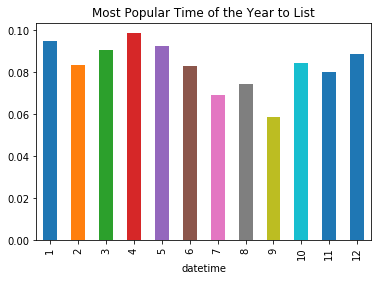

In [18]:
(month_counts_2/listings_with_reviews_df.shape[0]).plot(kind='bar');
plt.title('Most Popular Time of the Year to List')

In [19]:
listings_with_reviews_df['listing_id'].value_counts()

8637229     626
850531      478
1079349     441
4205578     435
415520      434
4695498     414
1634794     404
16493868    401
621305      379
926138      363
16491517    357
4724552     355
1108132     350
923017      349
4731911     347
1079351     347
1319156     344
2703224     338
5767728     333
13751232    332
3712078     331
4724533     327
11246705    324
7931794     323
2104151     320
775458      320
897942      320
4696858     318
16766385    313
11744144    310
           ... 
31158533      1
12639227      1
34259896      1
26812349      1
11681482      1
11326980      1
21774090      1
34224766      1
29975245      1
31058535      1
32904014      1
35627797      1
35199823      1
10096800      1
19818048      1
19693708      1
33822697      1
22555847      1
5247262       1
32900779      1
31911996      1
34850713      1
28976805      1
11688660      1
33974030      1
34545626      1
28427603      1
31906874      1
34007376      1
10602388      1
Name: listing_id, Length

### Find most popular neighborhood listed

In [20]:
listings_summary_df_filtered = listings_summary_df[listings_summary_df['neighbourhood'].isnull() == False]

In [21]:
pop_neighborhood_count = listings_summary_df_filtered['neighbourhood'].value_counts()

In [22]:
pop_neighborhood_count.reset_index()

,index,neighbourhood
0,Yau Tsim Mong,4764
1,Central & Western,2628
2,Wan Chai,2315
3,Islands,547
4,Kowloon City,465
5,Eastern,402
6,Sham Shui Po,261
7,Yuen Long,246
8,North,232
9,Sai Kung,169


Text(0.5,1,'Most Popular Neighborhood')

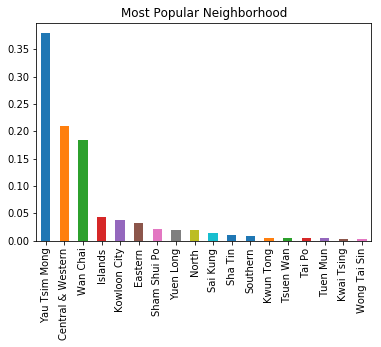

In [23]:
(pop_neighborhood_count/listings_summary_df.shape[0]).plot(kind='bar');
plt.title('Most Popular Neighborhood')

### Find host with the greatest amount of listings

In [24]:
listing_count = listings_summary_df['host_id'].value_counts().reset_index()
listing_count

,index,host_id
0,7518056,484
1,97240131,216
2,122131447,163
3,14861546,100
4,138649185,83
5,21591327,81
6,4584648,80
7,52473150,72
8,156409670,63
9,30098437,54


Text(0.5,1,'Number of Listings by Host')

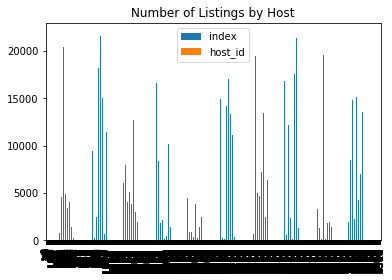

In [25]:
(listing_count/listings_summary_df.shape[0]).plot(kind='bar');
plt.title('Number of Listings by Host')

### Find most expensive listing

In [26]:
cal_df_filtered = cal_df[cal_df['price'].isnull()==False]
cal_df_filtered.shape

(4587685, 7)

In [38]:
cal_df.sort_values(by=['price'], ascending=False).head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4308245,35620700,2020-01-16,f,$999.00,$999.00,1,500
4434203,36051133,2019-12-10,f,$999.00,$999.00,6,60
4434210,36051133,2019-12-17,f,$999.00,$999.00,6,60
4434209,36051133,2019-12-16,f,$999.00,$999.00,6,60
4434208,36051133,2019-12-15,f,$999.00,$999.00,6,60
4434207,36051133,2019-12-14,f,$999.00,$999.00,6,60
4434206,36051133,2019-12-13,f,$999.00,$999.00,6,60
4434205,36051133,2019-12-12,f,$999.00,$999.00,6,60
4434204,36051133,2019-12-11,f,$999.00,$999.00,6,60
4434202,36051133,2019-12-09,f,$999.00,$999.00,6,60


In [41]:
listings_summary_df[listings_summary_df.id == 35620700]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11838,35620700,"RM2 2人双床,近油麻地地铁站出口,与步行街相邻,女人世界(西洋菜南街),兆萬商場",52473150,Danny,NaN,Yau Tsim Mong,22.31485,114.16948,Private room,1001,1,0,NaN,NaN,72,58


### Find Most Reviewed Listing

In [28]:
final_df = pd.DataFrame()
for chunk in pd.read_csv(r'data/listings.csv', chunksize=100):
#     import pdb; pdb.set_trace()
    final_df = final_df.append(chunk[chunk['reviews_per_month'] >= 4.0])

In [35]:
final_df.sort_values(by=['reviews_per_month'], ascending=True).head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11152,34854906,https://www.airbnb.com/rooms/34854906,20190713020708,2019-07-13,Leighton home 2mins to Times Square D (禮寓-時代館 D),ATTENTION~~Airbnb is giving DISCOUNT HK$250 of...,This apartment has 7 rooms with a reception. 本...,ATTENTION~~Airbnb is giving DISCOUNT HK$250 of...,none,studio apartment located at the heart Causeway...,...,t,f,strict_14_with_grace_period,f,f,7,7,0,0,4.0
11428,35177785,https://www.airbnb.com/rooms/35177785,20190713020708,2019-07-13,3min MTR Best Location TST 1BR Harbour City,Shoppers and Sightseeing Paradise. Just acros...,Newly renovated and furnished 1 bedroom apartm...,Shoppers and Sightseeing Paradise. Just acros...,none,Tsim Sha Tsui is the city’s most exciting area...,...,t,f,strict_14_with_grace_period,f,f,15,15,0,0,4.0
7284,27668505,https://www.airbnb.com/rooms/27668505,20190713020708,2019-07-13,"6號#雙單人床步行8分鐘佐敦站A/機場快線九龍站C1/高鐵站G層K2出口,5分鐘柯士甸A,近...","预订前请先细阅以下内容:在爱彼迎上选中心仪的住处以后输入入住的日子,如果日子没有被预订的话系...","智能密碼門鎖自助出入,晚上十分寧靜｡ PS : 此房間面積約為13平方米","预订前请先细阅以下内容:在爱彼迎上选中心仪的住处以后输入入住的日子,如果日子没有被预订的话系...",none,樓下24小時便利店 自助洗衣乾衣店 樓下就是明星推薦餐廳 包括全球101最佳餐廳(點點心)及...,...,t,f,strict_14_with_grace_period,f,f,7,7,0,0,4.0
11728,35496888,https://www.airbnb.com/rooms/35496888,20190713020708,2019-07-13,Stylist 2 bedrooms in heart of TST (5mins to MTR),Design stylish apartment recently finished in ...,The family-friendly apartment has two bedrooms...,Design stylish apartment recently finished in ...,none,The studio is very well located in the middle ...,...,t,f,moderate,f,f,1,1,0,0,4.0
11348,35076781,https://www.airbnb.com/rooms/35076781,20190713020708,2019-07-13,"#E 全新舒適獨享整個公寓,步行6分鐘到佐敦地鐵站,5月26日新推出房源",⁉️⁉️Please read below room description before ...,"➡️➡️Own entire listing, with individual toilet...",⁉️⁉️Please read below room description before ...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,9,9,0,0,4.0
